# 1. Importing the dependencies

In [4]:
!pip install imbalanced-learn


In [7]:
!pip install xgboost



  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE #because our dataset(target column) is unbalanced
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

# 2. Data loading and understanding

In [72]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [73]:
df.shape

(7043, 21)

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [76]:
# see usually the total charges should be floating type but here it shows that it is object type so we have to change it
# and also customer id is not important.


In [77]:
# droping customer id columns as it is not required for modelling
df=df.drop(columns=["customerID"])

In [78]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [79]:
# printing the unique values in all the columns to see whether the columns are actually categorical or not
numerical_features_list=["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
    if col not in numerical_features_list:   # because we only want to see the unique values of categorical columns
        print(col,df[col].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [80]:
# converting datatype of TotalCharges columns from object to floating 
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
#df["TotalCharges"]=df["TotalCharges"].astype(float)
                                             

In [82]:
# if you comment out above code then from above error we can saay that some values of TotalCharges columns are filled by space and that is string type. thatswhy we cannot change those
# value to float


In [83]:
len(df[df["TotalCharges"]==" "])

11

In [84]:
# here are those 11 columns
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [85]:
# usually we know that Totalcharges=tenure*monthlycharges... for those 11 rows tenure is zero so we can replace the space of totalcharges by zero.
df["TotalCharges"]=df["TotalCharges"].replace({" ":0.0})

In [86]:
# Now, we can change the datatype of totalcharges column
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [88]:
# Now we want understand whether the distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [89]:
# so we can say that target columns is Immbalanced... so we have to apply oversampling or undersampling

**Insight**
* 1. Customer id is remove as it is not required
  2. No missing values in the dataset
  3. Missing values in TotalCharges columns were replace by zero.
  4. class imbalanced identify in the target

# 3. Exploratory Data Analysis

**Numerical Features Analysis**

In [90]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [91]:
# understand the distribution 
def plot_histogram(df,column_name):

    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f"distribution of{column_name}")

    #calculate the mean and median of the column
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    # add vertical lines for mean and median
    plt.axvline(col_mean,color='red',linestyle='--',label="Mean")
    plt.axvline(col_median,color='green',linestyle='-',label="Median")

    plt.legend()

    plt.show()

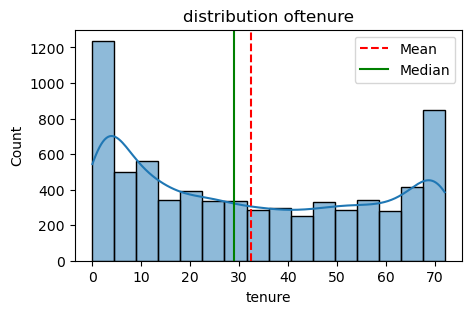

In [92]:
plot_histogram(df,"tenure")

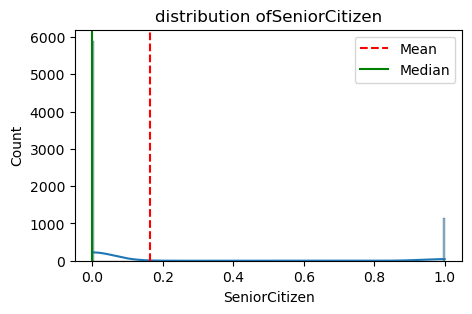

In [93]:
plot_histogram(df,"SeniorCitizen")

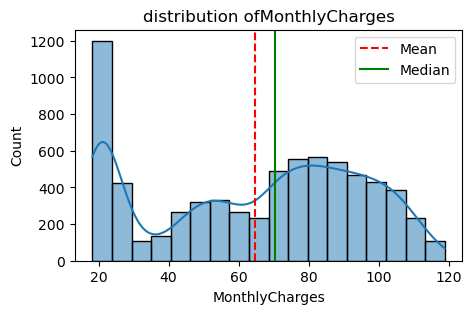

In [94]:
plot_histogram(df,"MonthlyCharges")

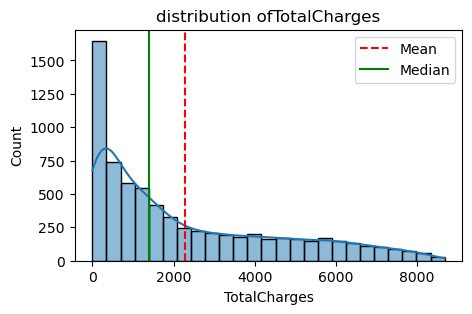

In [95]:
plot_histogram(df,"TotalCharges")

In [96]:
# Boxplot for numerical features
def plot_boxplot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show()

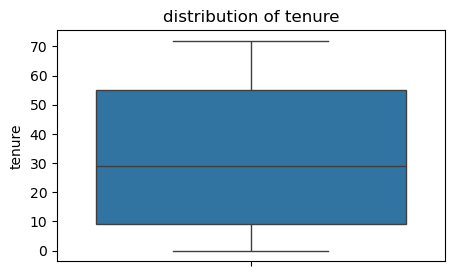

In [97]:
plot_boxplot(df,"tenure")

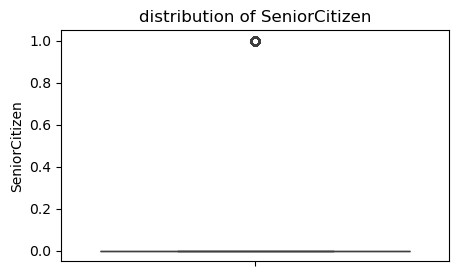

In [98]:
plot_boxplot(df,"SeniorCitizen")

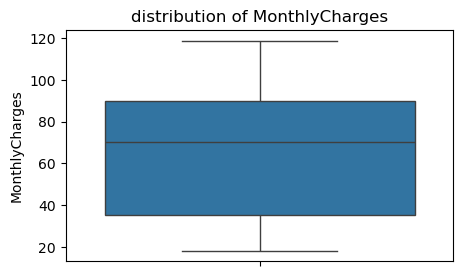

In [99]:
plot_boxplot(df,"MonthlyCharges")

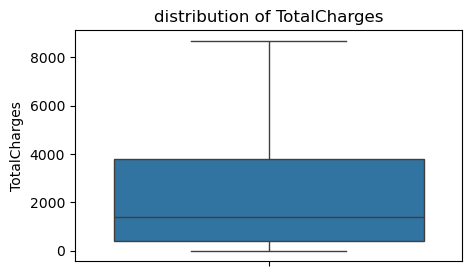

In [100]:
plot_boxplot(df,"TotalCharges")

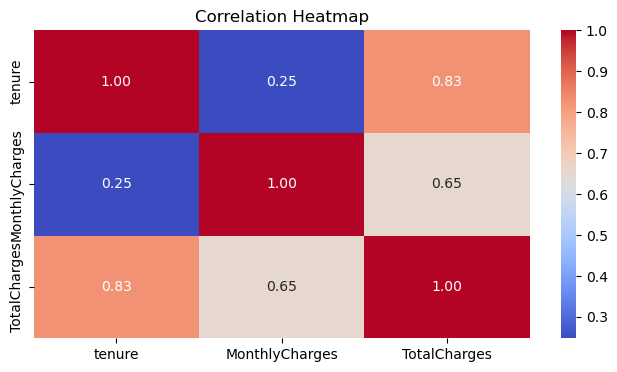

In [101]:
# Correlation heatmap/correlation matrix ... to know correlation between two features
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [102]:
# here we can see that the correlation between tenure and totalcharges is high so we can drop one...but we will go with by taking both

**Categorical Features Analysis**

In [103]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [104]:
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [105]:
#also we want to add Seniorcitizen as categorical column becausse it takes only two values
object_cols=["SeniorCitizen"]+object_cols

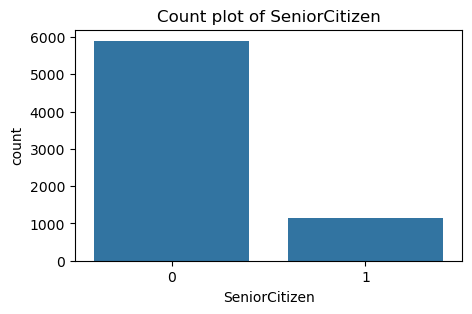

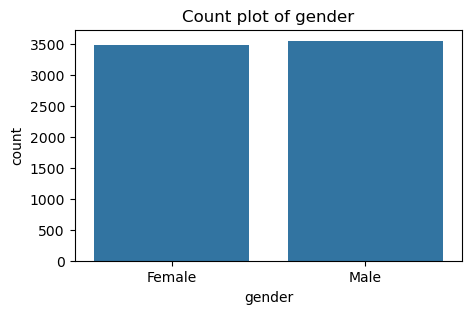

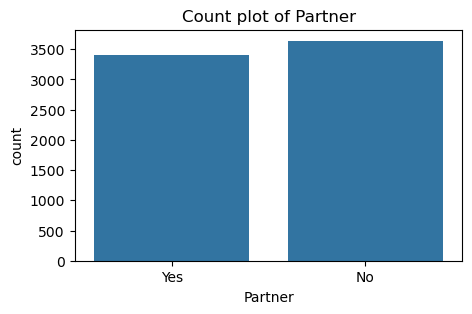

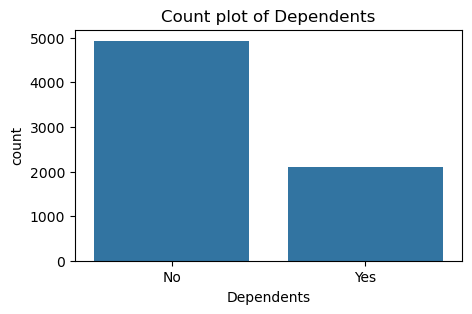

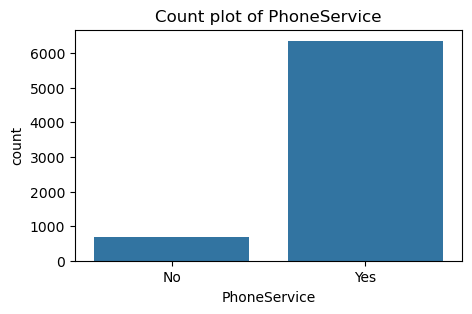

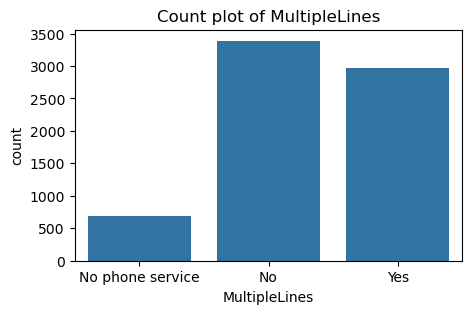

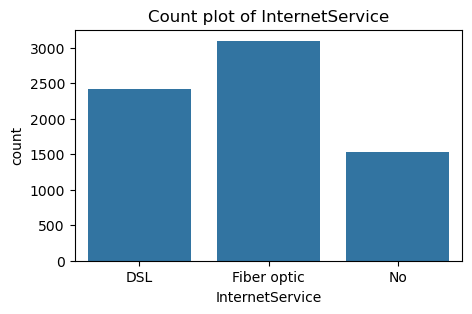

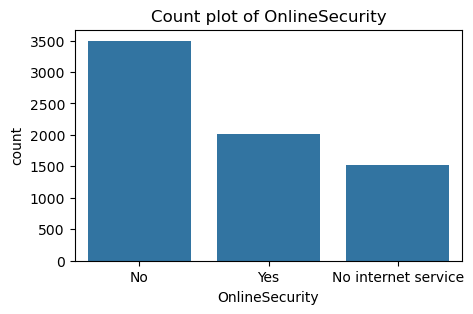

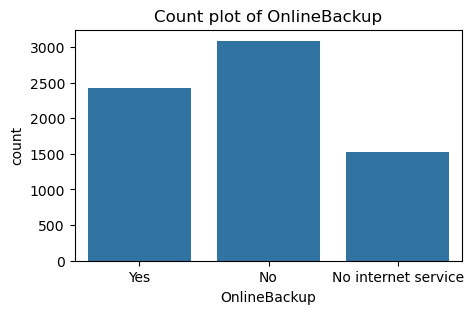

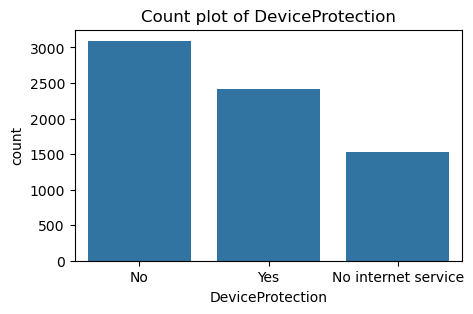

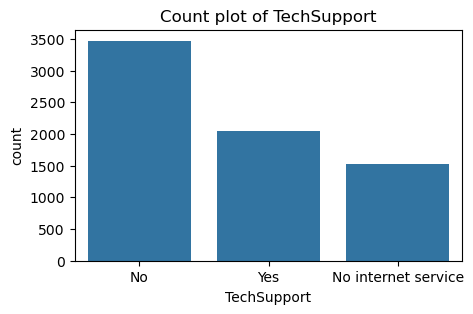

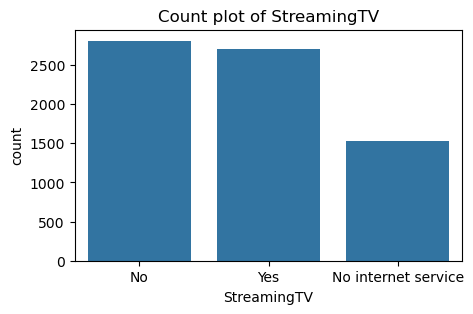

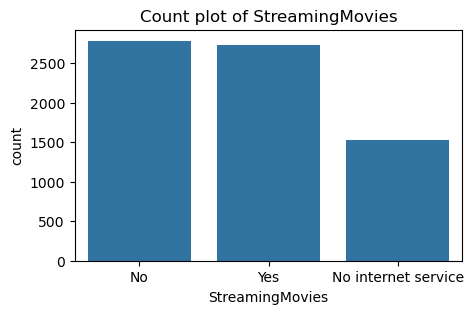

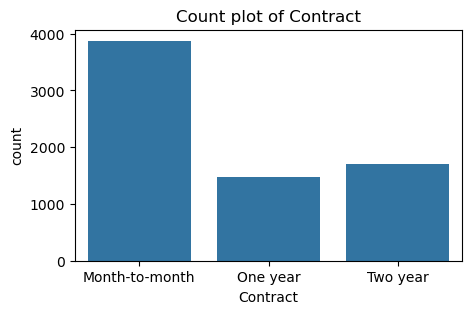

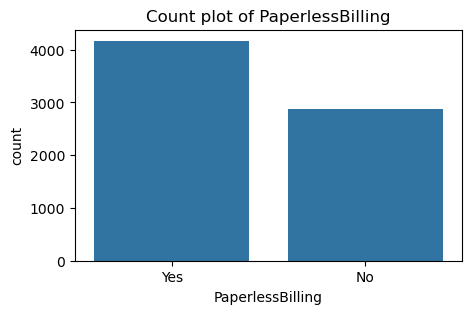

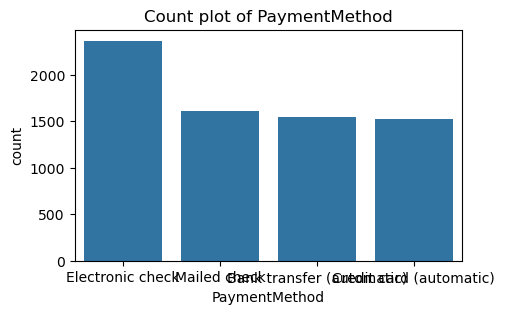

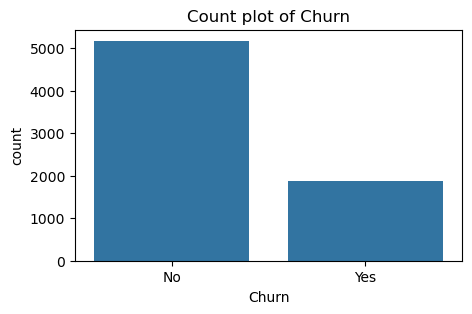

In [106]:
# Countplot for categorical plot
for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()

In [107]:
# we can see that there is imbalanced in some features as we will use dtree so this thing will not effect so much other than target column(churn)

# 4. Data Preprocessing

In [108]:
# applying LabelEncoder in categorical data
# in target column
df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})

C:\Users\mail2\AppData\Local\Temp\ipykernel_19532\182312735.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})


In [109]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [110]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [111]:
#identifying columns 
object_columns=df.select_dtypes(include="object").columns

In [112]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [113]:
#LabelEncoding of features/columns (which are of object datatypes)
# initilaze a dictionary to save the encoders
encoders={}

# apply label encoding and store the encoders
for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder

    # save the encoder to a pickle file because we want to use same encoder 
    with open("encoders.pkl","wb") as f:
        pickle.dump(encoders,f)

In [114]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [115]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [116]:
# you also can use onehotencoding

# 4.Training and test data split 

In [117]:
X=df.drop(columns=["Churn"])
y=df["Churn"]

In [118]:
# As we are using tree based model so we dont have to use standard scaling at numerical columns... else we have to use that


In [119]:
# split training and test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [120]:
print(y_train.value_counts())
      

Churn
0    4138
1    1496
Name: count, dtype: int64


In [121]:
# still there is imbalanced in target column thatswhy we will use SMOTE

**Synthetic Minority Oversaampling Technique(SMOTE)**

In [122]:
smote=SMOTE(random_state=42)

In [123]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)  # oversaampling will be ddone only in training data

In [124]:
print(y_train_smote.shape)

(8276,)


In [125]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [126]:
# here we are doing oversampling thatswhy both take the value 4138.... if we do undersampling then both class of target column takes the lower value
# which is 1496 

# 5. Model Training

In [127]:
# using default hyperparameters
models={
    "DecisionTree":DecisionTreeClassifier(random_state=42),
    "RandomForest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
                           
}

In [128]:
# Dictionary to store the cross validation results
cv_score={}
#perform 5-fold cross validation for each model
for model_name,model in models.items():
    print(f"Training {model_name} with default parameters")
    scores=cross_val_score(model, X_train_smote,y_train_smote,cv=5,scoring="accuracy")
    cv_score[model_name]=scores
    print(f"{model_name} cross validation accuracy:{np.mean(scores):.2f}")
    print("*"*50)
    

Training DecisionTree with default parameters
DecisionTree cross validation accuracy:0.78
**************************************************
Training RandomForest with default parameters
RandomForest cross validation accuracy:0.84
**************************************************
Training XGBoost with default parameters
XGBoost cross validation accuracy:0.83
**************************************************


In [129]:
cv_score

{'DecisionTree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'RandomForest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [130]:
# So, we can say that Random forest working well with defaults parameters... thatswhy we will trend Random Forest .

In [131]:
rfc=RandomForestClassifier(random_state=42)


In [132]:
rfc.fit(X_train_smote,y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 6.Model Evaluation

In [133]:
# Evaluation on test data
y_pred=rfc.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classifiaction Report:\n",classification_report(y_test,y_pred))

Accuracy Score:
 0.7771469127040455
Confusion Matrix:
 [[880 156]
 [158 215]]
Classifiaction Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [134]:
# You can see that accuracy decreased because we know that in out testing target column we also have imbalanced
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


# Now,we want to use Gridsearch

In [135]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [136]:

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_smote,y_train_smote)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [143]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.7842441447835344


In [ ]:
# the accuracy score is almost same as previous ... you can try with another combinations... as it is same as previous thatswhy we just save the
# previous random forest model as pkl

In [87]:
# save the trained modelas a pickle file 
model_data={"model":rfc,"features_names":X.columns.tolist()} # here we are saving the trained model (random Forest) with corresponding features which 
#were taken to build the model (accept customer ID)

with open("customer_churn_model.pkl","wb") as f:
    pickle.dump(model_data,f)

# 7. Load the saved model and build a predicted system

In [116]:
# Load the saved model and encoders
with open("customer_churn_model.pkl","rb") as f:
    model_data=pickle.load(f)

    loaded_model=model_data["model"]
    features_names=model_data["features_names"]

In [114]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [115]:
print(features_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [106]:
# Now we want to see the result let's take one data point (1st row)
customer_data = {
    
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}


In [117]:
customer_data_df=pd.DataFrame([customer_data])
# here we are loading the encoder pkl file
with open("encoders.pkl","rb") as f:
    encoders=pickle.load(f)
print(customer_data_df.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  


In [108]:
#Encode categorical features
for column, encoder in encoders.items():
    customer_data_df[column]=encoder.transform(customer_data_df[column])
print(customer_data_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  


In [109]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [112]:
#Make a prediction
prediction=loaded_model.predict(customer_data_df)
print(f" Prediction : {"Churn" if prediction[0]==1 else "No Churn"}")

 Prediction : No Churn


In [139]:
xgb = XGBClassifier(
    objective='binary:logistic',   # use 'multi:softprob' for multiclass
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)


In [140]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [141]:
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',   # or 'f1', 'roc_auc' for imbalanced data
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\mail2\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:11:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [142]:
best_model1 = grid.best_estimator_

y_pred = best_model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.7842441447835344
